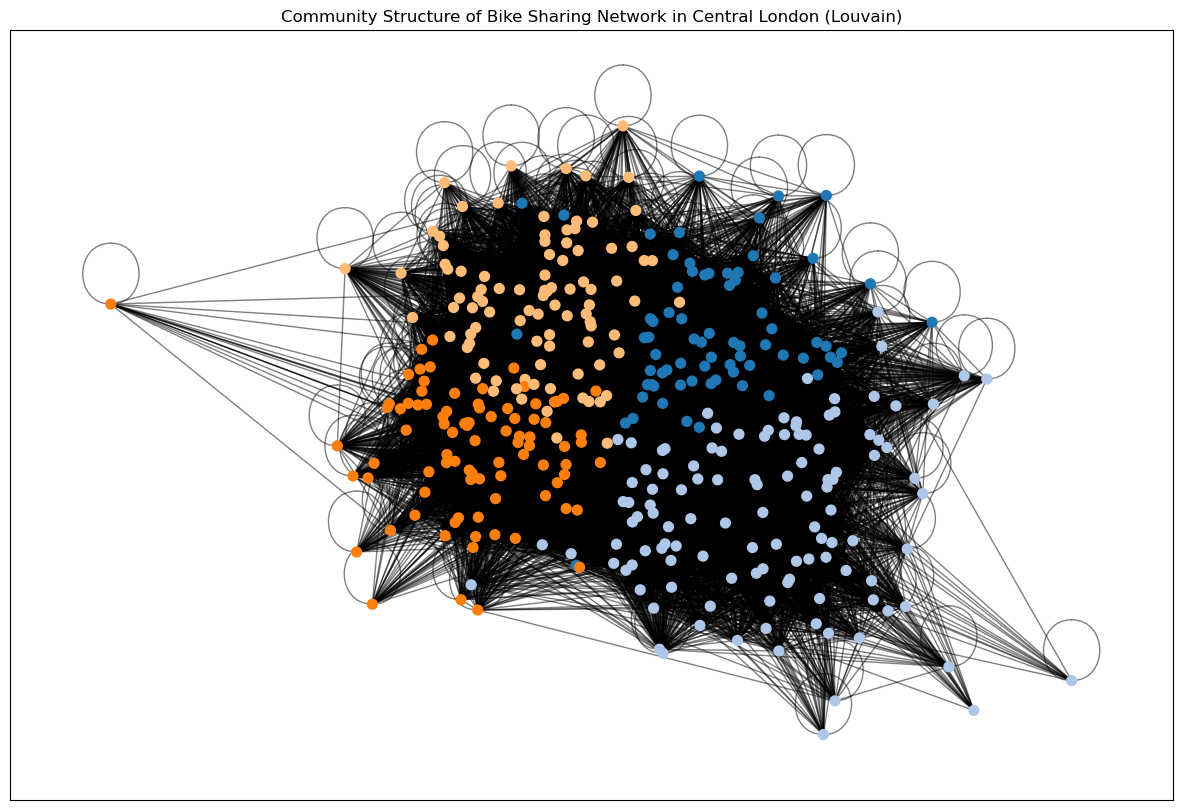

In [6]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain

# Load the data
file_path = 'complete_data_final.csv'
trip_data = pd.read_csv(file_path)

# Create an undirected graph
G = nx.Graph()

# Add edges to the graph
for index, row in trip_data.iterrows():
    start_station = row['Start station number']
    end_station = row['End station number']
    if G.has_edge(start_station, end_station):
        G[start_station][end_station]['weight'] += 1
    else:
        G.add_edge(start_station, end_station, weight=1)

# Optional: Preprocess the graph by removing edges below a certain weight threshold
threshold = 5  # Adjust this threshold as needed
edges_to_remove = [(u, v) for u, v, w in G.edges(data=True) if w['weight'] < threshold]
G.remove_edges_from(edges_to_remove)

# Apply Louvain community detection with adjustable resolution parameter
resolution = 1.02  # Adjust this value to change the size of communities
partition = community_louvain.best_partition(G, weight='weight', resolution=resolution, random_state=42)

# Create a color map for the communities
color_map = {}
colors = plt.cm.tab20.colors  # Get a set of colors
for idx, community in enumerate(set(partition.values())):
    color_map[community] = colors[idx % len(colors)]

# Assign colors to nodes based on their community
node_colors = [color_map[partition[node]] for node in G.nodes()]

# Draw the graph
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, seed=42)  # Position nodes using Fruchterman-Reingold force-directed algorithm

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=50)
nx.draw_networkx_edges(G, pos, alpha=0.5)

plt.title('Community Structure of Bike Sharing Network in Central London (Louvain)')
plt.show()


Modularity: 0.28090474008437866


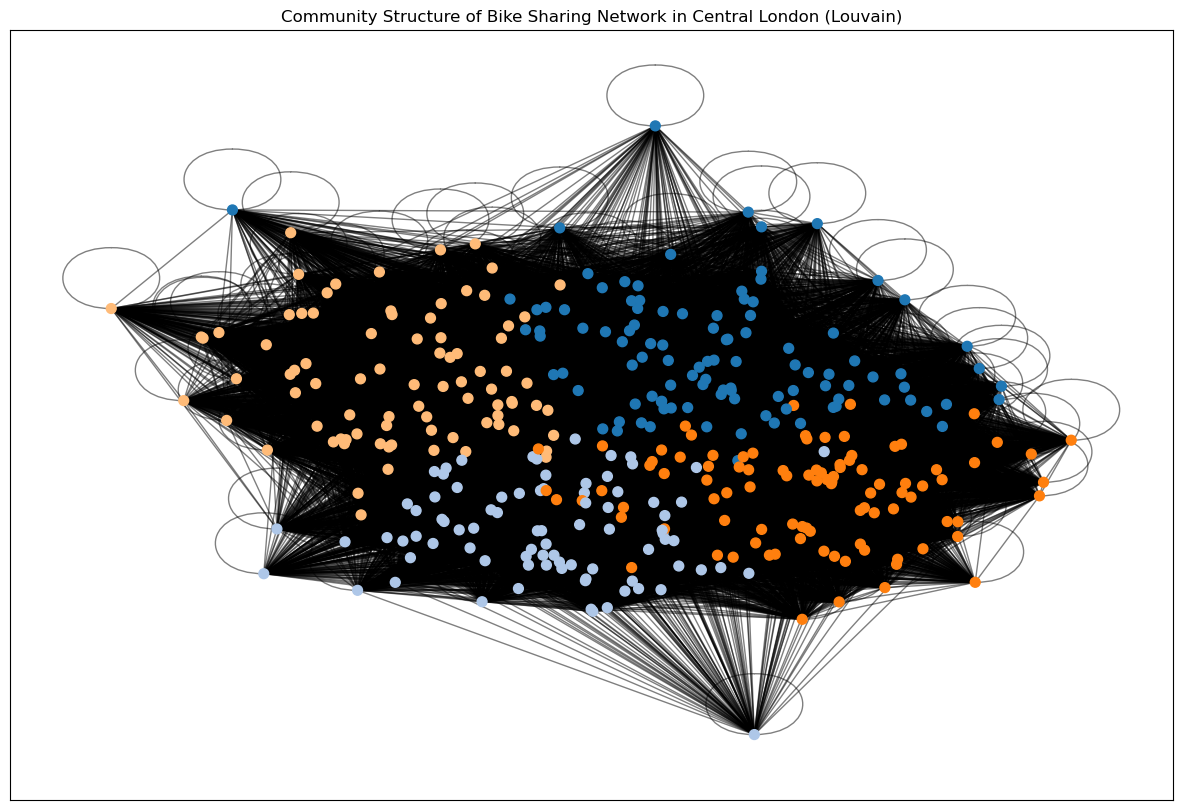

In [15]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain

# Load the data
file_path = 'complete_data_final.csv'
trip_data = pd.read_csv(file_path)

# Create an undirected graph
G = nx.Graph()

# Add edges to the graph
for index, row in trip_data.iterrows():
    start_station = row['Start station number']
    end_station = row['End station number']
    if G.has_edge(start_station, end_station):
        G[start_station][end_station]['weight'] += 1
    else:
        G.add_edge(start_station, end_station, weight=1)

# # Optional: Preprocess the graph by removing edges below a certain weight threshold
# threshold = 3  # Adjust this threshold as needed
# edges_to_remove = [(u, v) for u, v, w in G.edges(data=True) if w['weight'] < threshold]
# G.remove_edges_from(edges_to_remove)

# Apply Louvain community detection with adjustable resolution parameter
resolution = 1.02 # Adjust this value to change the size of communities
partition = community_louvain.best_partition(G, weight='weight', resolution=resolution)

# Calculate the modularity
modularity = community_louvain.modularity(partition, G)
print(f'Modularity: {modularity}')

# Create a color map for the communities
color_map = {}
colors = plt.cm.tab20.colors  # Get a set of colors
for idx, community in enumerate(set(partition.values())):
    color_map[community] = colors[idx % len(colors)]

# Assign colors to nodes based on their community
node_colors = [color_map[partition[node]] for node in G.nodes()]

# Draw the graph
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, seed=42)  # Position nodes using Fruchterman-Reingold force-directed algorithm

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=50)
nx.draw_networkx_edges(G, pos, alpha=0.5)

plt.title('Community Structure of Bike Sharing Network in Central London (Louvain)')
plt.show()


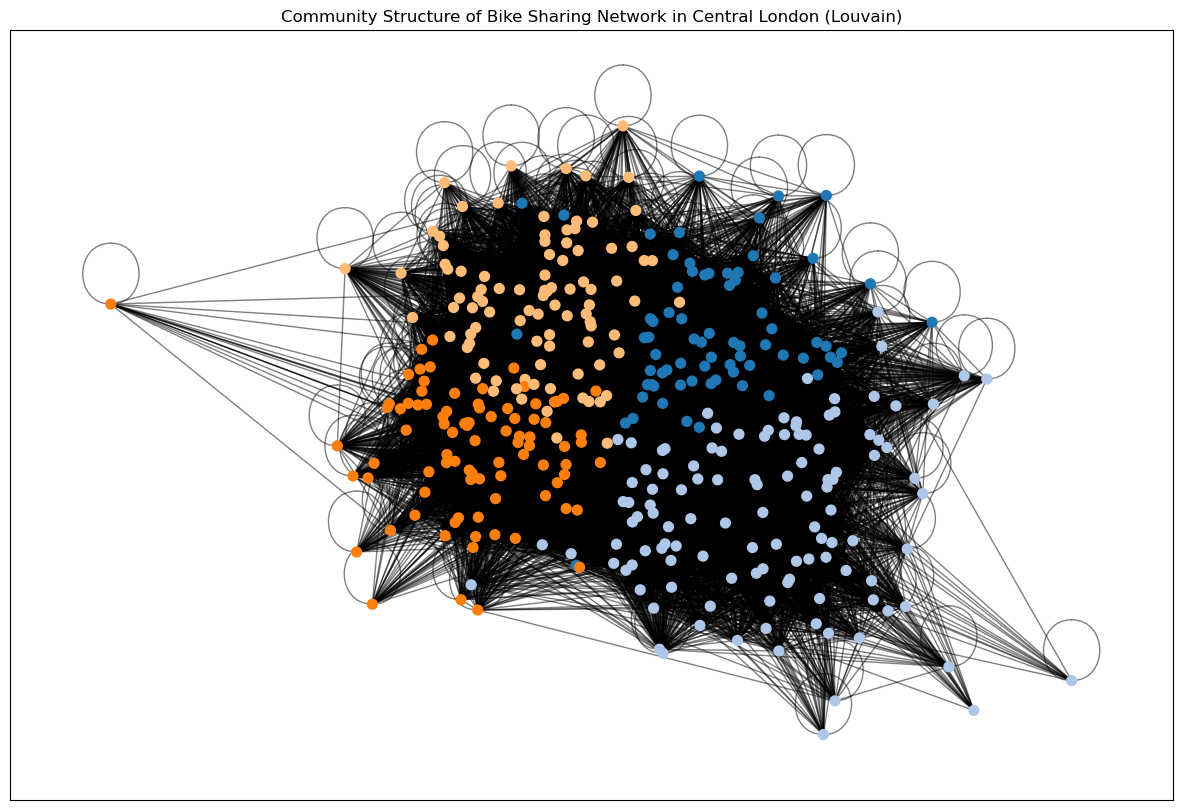

Jaccard Distances between Communities based on Trips
          0         1         2         3
0       NaN  0.836265  0.876331  0.833151
1  0.836265       NaN  0.853631  0.876167
2  0.876331  0.853631       NaN  0.820166
3  0.833151  0.876167  0.820166       NaN


In [16]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain

# Load the data
file_path = 'complete_data_final.csv'
trip_data = pd.read_csv(file_path)

# Create an undirected graph
G = nx.Graph()

# Add edges to the graph
for index, row in trip_data.iterrows():
    start_station = row['Start station number']
    end_station = row['End station number']
    if G.has_edge(start_station, end_station):
        G[start_station][end_station]['weight'] += 1
    else:
        G.add_edge(start_station, end_station, weight=1)

# Optional: Preprocess the graph by removing edges below a certain weight threshold
threshold = 5  # Adjust this threshold as needed
edges_to_remove = [(u, v) for u, v, w in G.edges(data=True) if w['weight'] < threshold]
G.remove_edges_from(edges_to_remove)

# Apply Louvain community detection with adjustable resolution parameter
resolution = 1.02  # Adjust this value to change the size of communities
partition = community_louvain.best_partition(G, weight='weight', resolution=resolution, random_state=42)

# Create a color map for the communities
color_map = {}
colors = plt.cm.tab20.colors  # Get a set of colors
for idx, community in enumerate(set(partition.values())):
    color_map[community] = colors[idx % len(colors)]

# Assign colors to nodes based on their community
node_colors = [color_map[partition[node]] for node in G.nodes()]

# Draw the graph
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, seed=42)  # Position nodes using Fruchterman-Reingold force-directed algorithm

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=50)
nx.draw_networkx_edges(G, pos, alpha=0.5)

plt.title('Community Structure of Bike Sharing Network in Central London (Louvain)')
plt.show()

# Create a dictionary where keys are stations and values are sets of trips (each trip can be represented as a tuple of (start_station, end_station))
station_trips = {}
for index, row in trip_data.iterrows():
    start_station = row['Start station number']
    end_station = row['End station number']
    trip = (start_station, end_station)
    
    if start_station not in station_trips:
        station_trips[start_station] = set()
    if end_station not in station_trips:
        station_trips[end_station] = set()
    
    station_trips[start_station].add(trip)
    station_trips[end_station].add(trip)

# Create a dictionary where keys are community ids and values are sets of stations in that community
communities = {}
for station, comm_id in partition.items():
    if comm_id not in communities:
        communities[comm_id] = set()
    communities[comm_id].add(station)

# Function to calculate Jaccard Distance between two sets
def jaccard_distance(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return 1 - intersection / union

# Calculate Jaccard Distance between all pairs of communities based on their station trips
community_ids = list(communities.keys())
jaccard_distances = pd.DataFrame(index=community_ids, columns=community_ids)

for i, comm1 in enumerate(community_ids):
    for j, comm2 in enumerate(community_ids):
        if i < j:
            # Aggregate all trips for each community
            comm1_trips = set()
            comm2_trips = set()
            for station in communities[comm1]:
                comm1_trips.update(station_trips[station])
            for station in communities[comm2]:
                comm2_trips.update(station_trips[station])
            
            # Calculate Jaccard Distance
            jd = jaccard_distance(comm1_trips, comm2_trips)
            jaccard_distances.at[comm1, comm2] = jd
            jaccard_distances.at[comm2, comm1] = jd

# Display the Jaccard Distance matrix
print("Jaccard Distances between Communities based on Trips")
print(jaccard_distances)

# Save the Jaccard Distance matrix to a CSV file for further analysis if needed
jaccard_distances.to_csv('jaccard_distances_between_communities.csv')
